<a href="https://colab.research.google.com/github/fwang312/Airbnb-User-Booking/blob/master/New_User_Booking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DA 1912 New User Booking Project

 Airbnb​​ ​ is​ ​ an​ ​ online​ ​ marketplace​ ​ and​ ​ hospitality​ ​ service,​ ​ enabling​ ​ people​ ​ to​ ​ lease​ ​ or​ ​ rent​ ​ short-term
lodging​ ​ including​ ​ vacation​ ​ rentals​ ​ , ​ ​ apartment​ ​ rentals,​ ​ homestays​ ​ , ​ ​ hostels​ ​ beds,​ ​ or​ ​ hotel​ ​ roo​ ms.
New​ ​ users​ ​ on​ ​ Airbnb​ ​ can​ ​ book​ ​ a ​ ​ place​ ​ to​ ​ stay​ ​ in​ ​ 34,000+​ ​ cities​ ​ across​ ​ 190+​ ​ countries.​ ​ 

- **Objective :**

   To predict travel destinations of users
   
-  **Dataset** -- Train_users.csv
 
    There are 16 features used to describe each user in the dataset:
    *         user id
    *         the date of account creation
    *         timestamp of the first activity, note that it can be earlier than
    *         date of first booking
    *         gender
    *         age
    *         signup_method
    *         the page a user came to signup up from
    *         international language preference
    *         what kind of paid marketing
    *         where the marketing is e.g. google, craigslist, other
    *         whats the first marketing the user interacted with before the signing up
    *         signup_app
    *         first_device_type
    *         first_browser

In [0]:
import numpy as np
import pandas as pd
import time
import random
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
pd.set_option('display.max_columns', None)

## Load Data



In [3]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [33]:
import os
os.chdir("/content/gdrive/My Drive/Project/New User Booking")
!ls

'DA1912_DAL_airbnb_Project__Sample_v10.5_edit (1).twbx'
'DA_1912_Project_4_Instruction (1).pdf'
'New User Booking.ipynb'
 New_User_Booking__Sample_Code.ipynb
 train_users.csv


In [0]:
df = pd.read_csv('train_users.csv')

In [60]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/10,2.009030e+13,NaN,-unknown-,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/11,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/10,2.009060e+13,8/2/10,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/11,2.009100e+13,9/8/12,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/10,2.009120e+13,2/18/10,-unknown-,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


In [61]:
print(df.shape)

print(df.columns)

(213451, 16)
Index(['id', 'date_account_created', 'timestamp_first_active',
       'date_first_booking', 'gender', 'age', 'signup_method', 'signup_flow',
       'language', 'affiliate_channel', 'affiliate_provider',
       'first_affiliate_tracked', 'signup_app', 'first_device_type',
       'first_browser', 'country_destination'],
      dtype='object')


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213451 entries, 0 to 213450
Data columns (total 16 columns):
id                         213451 non-null object
date_account_created       213451 non-null object
timestamp_first_active     213451 non-null float64
date_first_booking         88908 non-null object
gender                     213451 non-null object
age                        125461 non-null float64
signup_method              213451 non-null object
signup_flow                213451 non-null int64
language                   213451 non-null object
affiliate_channel          213451 non-null object
affiliate_provider         213451 non-null object
first_affiliate_tracked    207386 non-null object
signup_app                 213451 non-null object
first_device_type          213451 non-null object
first_browser              213451 non-null object
country_destination        213451 non-null object
dtypes: float64(2), int64(1), object(13)
memory usage: 26.1+ MB


In [63]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                          0
age                         87990
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## Data Cleaning

### 1)Gender

In [0]:
# Replacing gender values which are not presnet to Nan
df.gender.replace('-unknown-',np.nan, inplace= True)

In [65]:
df.head()

,id,date_account_created,timestamp_first_active,date_first_booking,gender,age,signup_method,signup_flow,language,affiliate_channel,affiliate_provider,first_affiliate_tracked,signup_app,first_device_type,first_browser,country_destination
0,gxn3p5htnn,6/28/10,2.009030e+13,NaN,NaN,NaN,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,NDF
1,820tgsjxq7,5/25/11,2.009050e+13,NaN,MALE,38.0,facebook,0,en,seo,google,untracked,Web,Mac Desktop,Chrome,NDF
2,4ft3gnwmtx,9/28/10,2.009060e+13,8/2/10,FEMALE,56.0,basic,3,en,direct,direct,untracked,Web,Windows Desktop,IE,US
3,bjjt8pjhuk,12/5/11,2.009100e+13,9/8/12,FEMALE,42.0,facebook,0,en,direct,direct,untracked,Web,Mac Desktop,Firefox,other
4,87mebub9p4,9/14/10,2.009120e+13,2/18/10,NaN,41.0,basic,0,en,direct,direct,untracked,Web,Mac Desktop,Chrome,US


### 2)Age

In [0]:
age = df['age']
age.fillna(-1, inplace = True)

In [0]:
## This are birthdays instead of age (estimating age by doing 2016 - value)
age = np.where(np.logical_and(age<2013, age>1917), 2017-age, age)

## This is the current year insted of age, we also consider this as N/A
age = np.where(np.logical_and(age<2016, age>2010), -1, age) 

In [0]:
df['age'] = age

In [75]:
df.isnull().sum()

id                              0
date_account_created            0
timestamp_first_active          0
date_first_booking         124543
gender                      95688
age                             0
signup_method                   0
signup_flow                     0
language                        0
affiliate_channel               0
affiliate_provider              0
first_affiliate_tracked      6065
signup_app                      0
first_device_type               0
first_browser                   0
country_destination             0
dtype: int64

## EDA

1) Country Destination

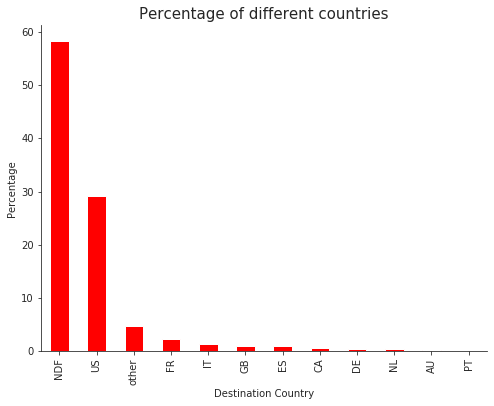

In [70]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

destination_percentage = df.country_destination.value_counts()/ df.shape[0] *100
destination_percentage.plot(kind = 'bar', color = 'red')
plt.xlabel('Destination Country')
plt.ylabel('Percentage')
plt.title('Percentage of different countries', size = 15)
sns.despine()

Observation:

1. 57% of users did not travel anywhere
2. 28% of users travelled in their home country(US)

### 3)Device Type

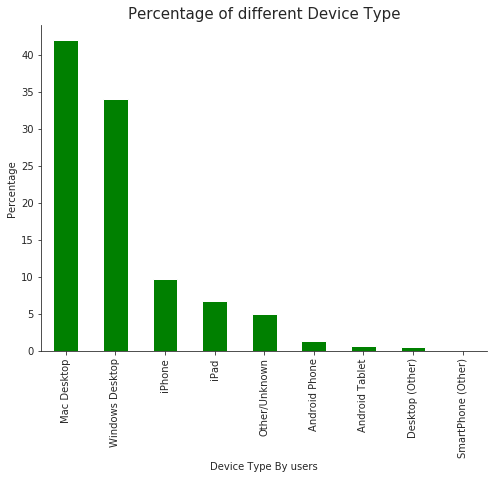

In [71]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

destination_percentage = df.first_device_type.value_counts()/ df.shape[0] *100
destination_percentage.plot(kind = 'bar', color = 'Green')
plt.xlabel('Device Type By users')
plt.ylabel('Percentage')
plt.title('Percentage of different Device Type', size = 15)
sns.despine()

Observations:

1. Nearly 60% of the users using Apple products.

2. 44% which implies Mac users booking more frequently.

### 3) Age

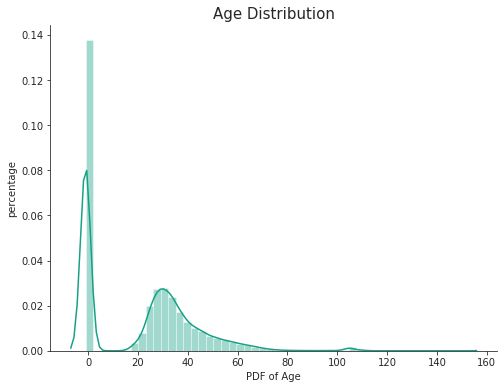

In [85]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,6)
sns.distplot(df.age.dropna(), color='#16A085')
plt.xlabel('PDF of Age')
plt.ylabel('percentage')
plt.title('Age Distribution', size = 15)
sns.despine()

Obervations:

1. Majority of the users are between age 25 and 40 years.

2. There are some age values which are less than 18 years old.

### 4)Age vs Contry Destination

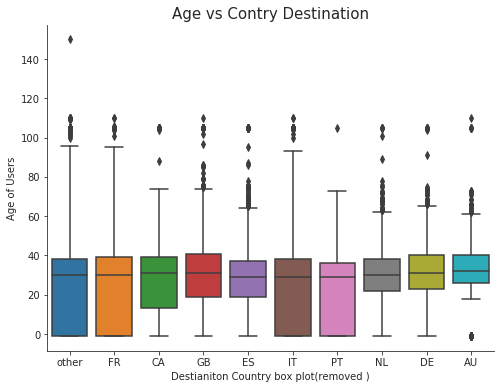

In [77]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8,6)

data_without_NDF = df[df['country_destination']!= 'US']
data_without_NDF1 = data_without_NDF[data_without_NDF['country_destination'] != 'NDF']
sns.boxplot(y = 'age', x= 'country_destination', data = data_without_NDF1)
plt.xlabel('Destianiton Country box plot(removed )')
plt.ylabel('Age of Users')
plt.title('Age vs Contry Destination', size = 15)

sns.despine()

### 5) Language Distribution

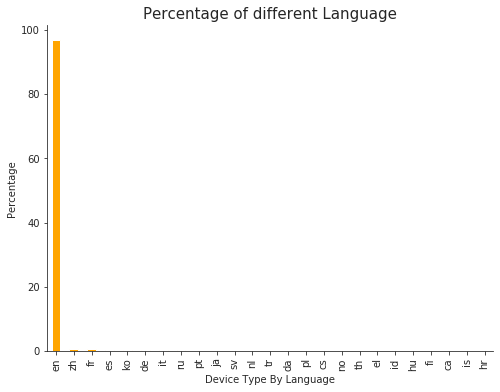

In [81]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(8, 6)

destination_percentage = df.language.value_counts()/ df.shape[0] *100
destination_percentage.plot(kind = 'bar', color = 'orange')
plt.xlabel('Device Type By Language')
plt.ylabel('Percentage')
plt.title('Percentage of different Language', size = 15)
sns.despine()

Observation: 

More than 95% of the users using English as their language.But it is still questionable because most of users are from U.S

### 6)Sign Up App:

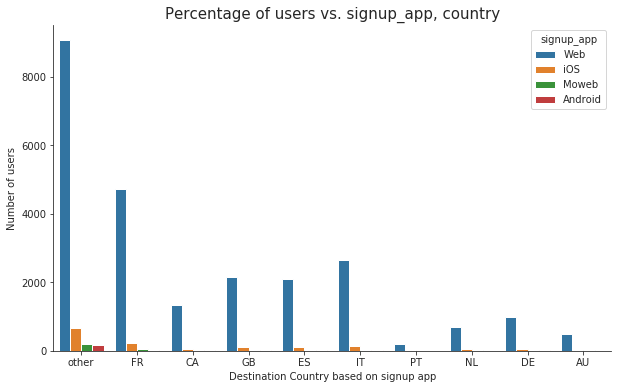

In [83]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(10, 6)

sns.countplot(x = 'country_destination', hue = 'signup_app', data = data_without_NDF1)

plt.xlabel('Destination Country based on signup app')
plt.ylabel('Number of users')
plt.title('Percentage of users vs. signup_app, country', size = 15)
sns.despine()

Observation:

1.Users with sign up app'Web" Outnumber than Other sign up method like Moweb, IOS, Android in every country.

2.Android is the lest used sign up app.

### 7) Affiliate Provider

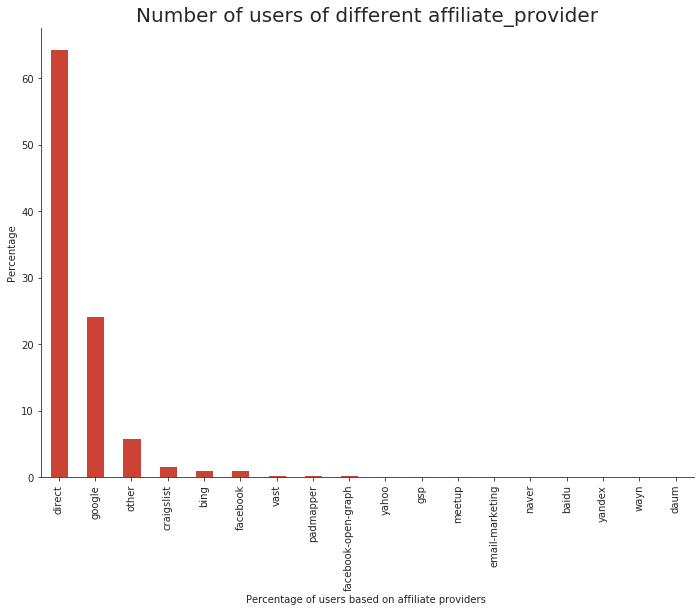

In [86]:
sns.set_style('ticks')
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
affiliate_provider_percentage = df.affiliate_provider.value_counts() / df.shape[0] * 100
affiliate_provider_percentage.plot(kind='bar',color='#CB4335')
plt.xlabel('Percentage of users based on affiliate providers ')
plt.ylabel('Percentage')
plt.title('Number of users of different affiliate_provider', size=20)
sns.despine()

Observations :

In previous plot we have observed that percentage of users signing up with google are 0.03% , but in this plot we  observe that most of users are coming  from google (22%)
